# Imports

In [63]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
# Importing the data
df_jobs = pd.read_csv('bert_topic_data.csv', sep=';')
topic_info = pd.read_csv('topic_info.csv', sep=';')
document_info = pd.read_csv('document_info.csv', sep=';')

# Giving names to the topics

In [16]:
pd.options.display.max_colwidth = 100
topic_info.iloc[15]

Topic                                                                                                                   14
Count                                                                                                                   28
Name                                                                                    14_analytics_analyst_insights_data
Representation         ['analytics', 'analyst', 'insights', 'data', 'reports', 'reporting', 'analyze', 'datadriven', 'd...
Representative_Docs    ['Data Analyst (Exclusive for Professionals with Disabilities) - About the vacancy\nThe Business...
Name: 15, dtype: object

In [65]:
# Gerado pelo ChatGPT 3.5
topic_names = {
    -1: 'Others',
    0: 'Data Analytics Engineer',
    1: 'BI Analyst',
    2: 'E-commerce Analyst',
    3: 'Cybersecurity Analyst',
    4: 'SAP Consulting Developer',
    5: 'SAP Engineering Intern',
    6: 'Logistics Manager',
    7: 'Lab Analyst',
    8: 'Java Developer',
    9: 'Clinical Analyst',
    10: 'Business Data Analyst',
    11: 'Market Analyst',
    12: 'Python Developer',
    13: 'Football Statistician',
    14: 'Data Analyst',
    15: 'Siemens Manager',
    16: 'Marketing Analyst',
    17: 'IBM Servicenow Consultant',
    18: 'Financial Engineer',
    19: 'Agile Automation Engineer',
    20: 'Energy Market Analyst',
    21: 'Accounting Analyst',
    22: 'Agoda Marketing Analyst',
    23: 'AI Engineer',
    24: 'Database Analyst',
    25: 'WordPress Developer',
    26: 'HR Analyst',
    27: 'AGI Accounting Analyst',
    28: 'Mobile App Developer',
    29: 'Engineering Recruiter',
    30: 'Pharmacotechnical Analyst',
    31: 'Backoffice Analyst',
    32: 'DevOps Engineer',
    33: 'Cloud Technician',
    34: 'Technical Support Analyst',
    35: 'Salesforce Developer',
    36: 'Credit Analyst',
    37: 'Tech Platform Developer',
    38: 'Agile Programmer',
    39: 'CRM Analyst',
    40: 'SQL Data Engineer',
    41: 'Systems Analyst',
    42: 'Agoda Marketing Strategist',
    43: 'Agile DBA',
    44: 'Marketplace Business Analyst',
    45: 'Sanitation Leader',
    46: 'ASP.NET Developer',
    47: 'Full-stack Developer',
    48: 'Software Developer'
}

# Functions

In [66]:
def melt_topics(main_column, dataframe):
    topic_vars = [f'topic{i}' for i in range(dataframe.Topic.max())]
    return dataframe[[main_column] + topic_vars].melt(id_vars=main_column)

def get_topic_title(row, title_dict):
    row = str(row)
    topic_number = re.sub('topic', '', row)
    return title_dict[int(topic_number)]

def get_top_n_probability_by_category(main_column, dataframe, n, title_dict):
    melted_topics = melt_topics(main_column, dataframe)
    df =  (melted_topics.groupby([main_column, 'variable'])['value'].mean().reset_index()
            .sort_values(by=[main_column, 'value'], ascending=False).groupby(main_column).head(n).reset_index())
    df['topic_name'] = df['variable'].apply(get_topic_title, args=[topic_names])
    return df

# Basic Cleaning

In [67]:
df_jobs = df_jobs.drop(df_jobs[df_jobs['worktype'].str.contains('/month')].index, axis=0)
df_jobs = df_jobs.drop(df_jobs[df_jobs['worktype'].str.contains('\+')].index, axis=0)
df_jobs['worktype'].value_counts()

Tempo integral    2069
Contrato            64
Estágio             22
Meio período        14
Temporário           6
Executivo            1
Name: worktype, dtype: int64

In [68]:
df_jobs['level'].value_counts()
df_jobs = df_jobs.drop(df_jobs[df_jobs['level'] == 'Diretor'].index, axis=0)
df_jobs = df_jobs.drop(df_jobs[df_jobs['level'] == 'Executivo'].index, axis=0)

In [69]:
df_jobs['topic_title'] = df_jobs['Topic'].map(lambda x:topic_names[x])
topic_info['title'] = topic_info['Topic'].apply(get_topic_title, args=[topic_names])

# Melt Analysis

In [70]:
get_top_n_probability_by_category('type_workplace', df_jobs, 1, topic_names)

,index,type_workplace,variable,value,topic_name
0,96,Remoto,topic0,0.045338,Data Analytics Engineer
1,49,Presencial,topic1,0.040603,BI Analyst
2,1,Híbrido,topic1,0.035321,BI Analyst


Text(0, 0.5, 'Topic Probability')

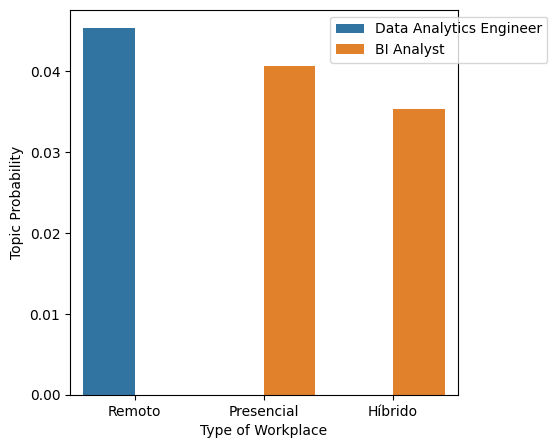

In [71]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=get_top_n_probability_by_category('type_workplace', df_jobs, 1, topic_names), x='type_workplace', y='value', hue='topic_name', ax=ax)
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
ax.set_xlabel('Type of Workplace')
ax.set_ylabel('Topic Probability')

In [72]:
data = get_top_n_probability_by_category('type_workplace', df_jobs, 5, topic_names)
data

,index,type_workplace,variable,value,topic_name
0,96,Remoto,topic0,0.045338,Data Analytics Engineer
1,100,Remoto,topic12,0.039350,Python Developer
2,106,Remoto,topic18,0.035627,Financial Engineer
3,125,Remoto,topic35,0.033273,Salesforce Developer
4,102,Remoto,topic14,0.031694,Data Analyst
5,49,Presencial,topic1,0.040603,BI Analyst
6,65,Presencial,topic24,0.039036,Database Analyst
7,50,Presencial,topic10,0.035481,Business Data Analyst
8,60,Presencial,topic2,0.033106,E-commerce Analyst
9,51,Presencial,topic11,0.031940,Market Analyst


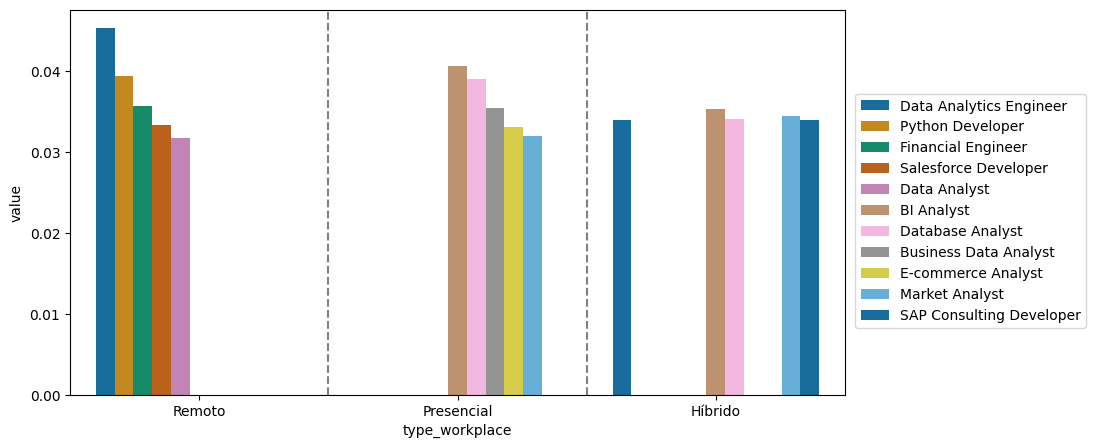

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))

plot = sns.barplot(data=data, x='type_workplace', y='value', hue='topic_name', ax=ax, palette='colorblind')
ax.legend(loc='upper right', bbox_to_anchor=(1.32, 0.8))

for cat in data['type_workplace'].unique()[:-1]:
    ax.axvline(plot.get_xticks()[data['type_workplace'].unique().tolist().index(cat) + 1] - 0.5, 
               color='gray', linestyle='--')
    


In [91]:
df_jobs['worktype'].value_counts()
df_jobs = df_jobs.drop(df_jobs[df_jobs['worktype'] == 'Executivo'].index, axis=0)

<Axes: xlabel='topic_name', ylabel='value'>

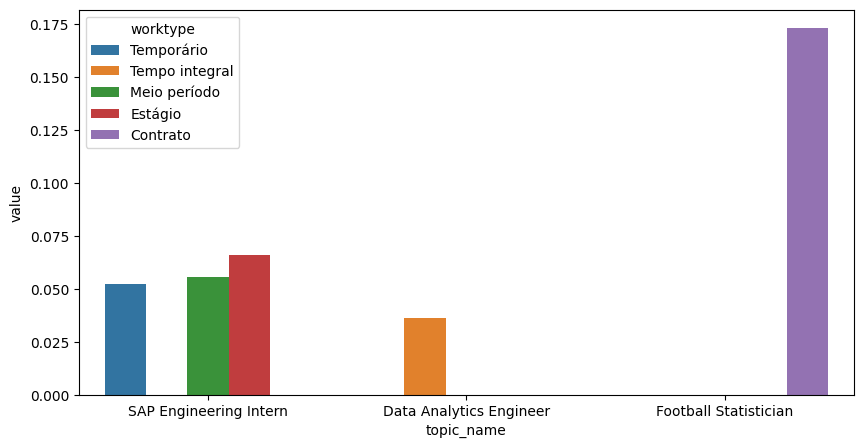

In [92]:
plt.subplots(figsize=(10, 5))
sns.barplot(data=get_top_n_probability_by_category('worktype', df_jobs, 1, topic_names), x='topic_name', y='value', hue='worktype')

<Axes: title={'center': 'Top-5 topics - Full-time'}, xlabel='topic_name', ylabel='value'>

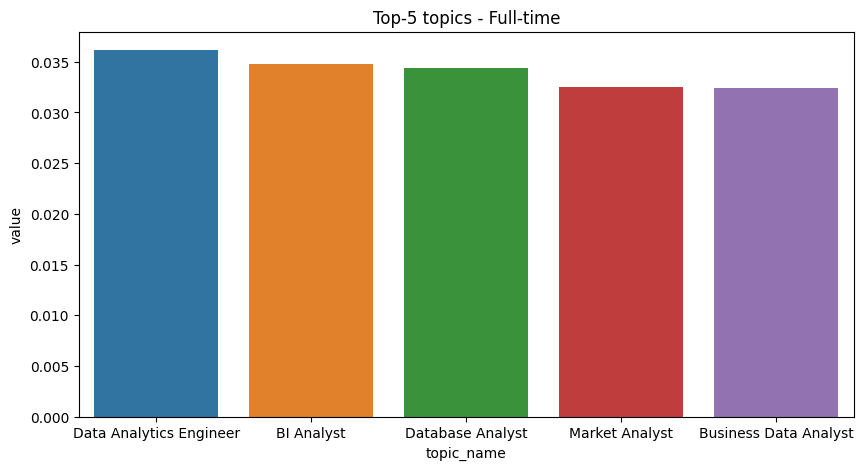

In [95]:
plt.subplots(figsize=(10, 5))
plt.title('Top-5 topics - Full-time')
sns.barplot(data=get_top_n_probability_by_category('worktype', df_jobs[df_jobs['worktype'] == 'Tempo integral'], 5, topic_names), x='topic_name', y='value')

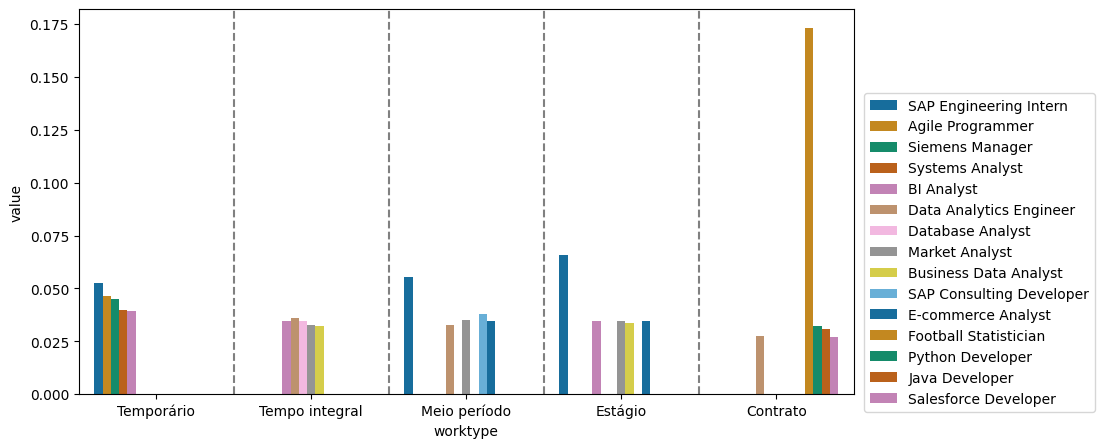

In [96]:
data = get_top_n_probability_by_category('worktype', df_jobs, 5, topic_names)
fig, ax = plt.subplots(figsize=(10, 5))

plot = sns.barplot(data=data, x='worktype', y='value', hue='topic_name', ax=ax, palette='colorblind')
ax.legend(loc='upper right', bbox_to_anchor=(1.32, 0.8))

for cat in data['worktype'].unique()[:-1]:
    ax.axvline(plot.get_xticks()[data['worktype'].unique().tolist().index(cat) + 1] - 0.5, 
               color='gray', linestyle='--')
    

<Axes: xlabel='level', ylabel='value'>

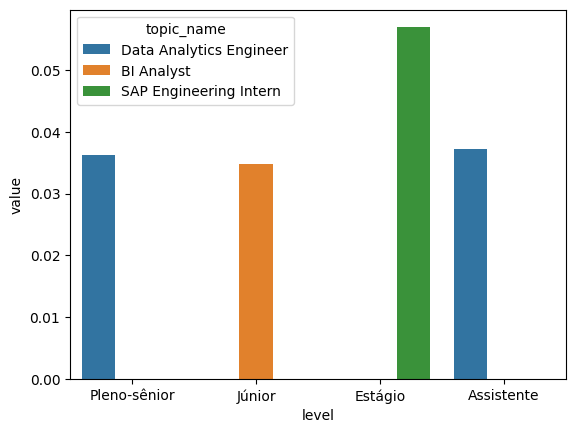

In [97]:
sns.barplot(data=get_top_n_probability_by_category('level', df_jobs, 1, topic_names), x='level', y='value', hue='topic_name')

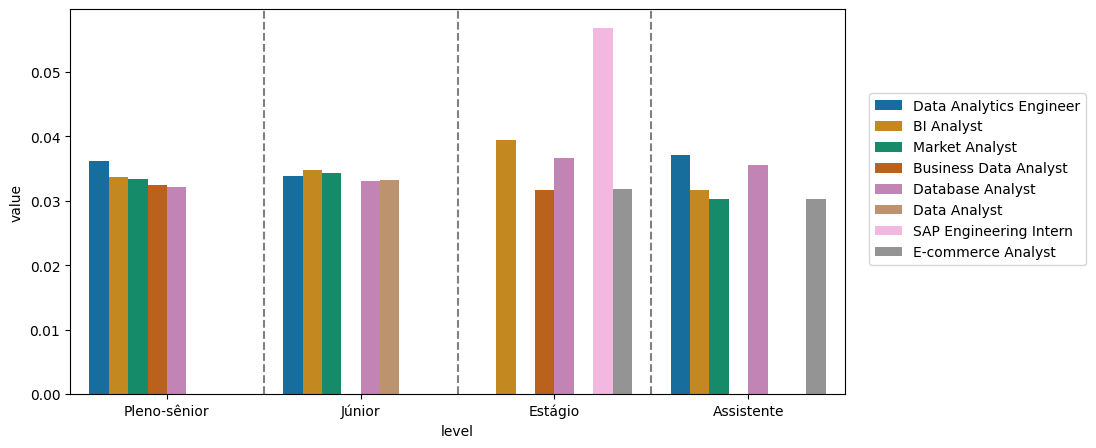

In [29]:
data = get_top_n_probability_by_category('level', df_jobs, 5, topic_names)
fig, ax = plt.subplots(figsize=(10, 5))

plot = sns.barplot(data=data, x='level', y='value', hue='topic_name', ax=ax, palette='colorblind')
ax.legend(loc='upper right', bbox_to_anchor=(1.32, 0.8))

for cat in data['level'].unique()[:-1]:
    ax.axvline(plot.get_xticks()[data['level'].unique().tolist().index(cat) + 1] - 0.5, 
               color='gray', linestyle='--')
    

<Axes: xlabel='Count', ylabel='title'>

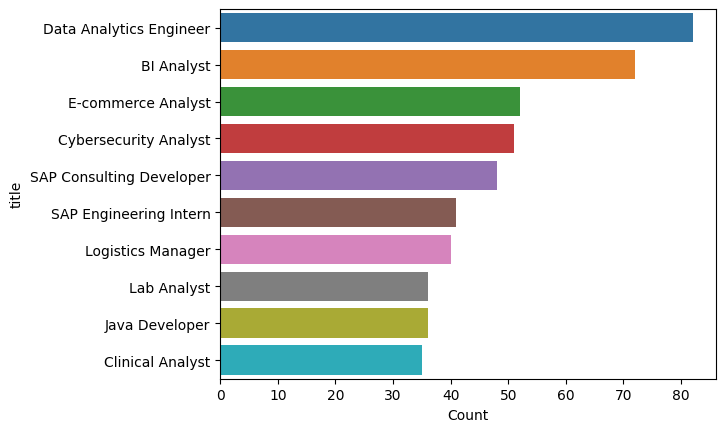

In [30]:
sns.barplot(topic_info[1:11], x='Count', y='title')

In [86]:
print(topic_info[1:11][['title', 'Topic', 'Representation']].to_html(index=None))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>title</th>
      <th>Topic</th>
      <th>Representation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Data Analytics Engineer</td>
      <td>0</td>
      <td>['databases', 'databricks', 'data', 'analytics', 'pipeline', 'pipelines', 'engineer', 'architecture', 'cloud', 'processing']</td>
    </tr>
    <tr>
      <td>BI Analyst</td>
      <td>1</td>
      <td>['analyst', 'bi', 'analytical', 'reports', 'dashboards', 'insights', 'database', 'data', 'analysis', 'sql']</td>
    </tr>
    <tr>
      <td>E-commerce Analyst</td>
      <td>2</td>
      <td>['customers', 'analyst', 'business', 'customer', 'sales', 'commerce', 'company', 'role', 'market', 'production']</td>
    </tr>
    <tr>
      <td>Cybersecurity Analyst</td>
      <td>3</td>
      <td>['cybersecurity', 'security', 'analyst', 'firewalls', 'certification', 'cisco', 'firewall', 'management', 'infrastructure', 'skills']</td>
    

<Axes: xlabel='value', ylabel='level'>

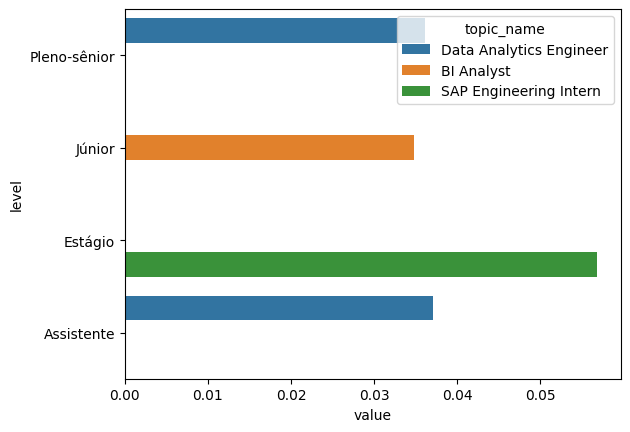

In [31]:
sns.barplot(data=get_top_n_probability_by_category('level', df_jobs, 1, topic_names), y='level', x='value', hue='topic_name')

# Skills & Topics Analysis

In [32]:
df_jobs_skills = df_jobs['required_skills'].dropna().map(lambda x: eval(x)).explode().reset_index()
df_jobs_merged = pd.merge(df_jobs, pd.get_dummies(df_jobs_skills).reset_index().groupby('index').sum(), how='inner', left_index=True, right_on='index').reset_index()

In [33]:
df_jobs_skills['required_skills'].value_counts()

Habilidades analíticas                    538
Comunicação                               532
Banco de dados                            370
Análise de dados                          310
Inglês                                    307
                                         ... 
Catalogação                                 1
Marketview                                  1
GTS                                         1
Conformidade com as normas de comércio      1
DELMIA                                      1
Name: required_skills, Length: 3186, dtype: int64

Filtering the skills that appear in more than 50 times, avoiding probability mistakes due to low presence of a skill

In [34]:
top_skills = df_jobs_skills['required_skills'].value_counts()
top_skills = top_skills[top_skills > 50].index
top_skills

Index(['Habilidades analíticas', 'Comunicação', 'Banco de dados',
       'Análise de dados', 'Inglês', 'Resolução de problemas',
       'Ciência de dados', 'SQL', 'Relatório', 'Trabalho em equipe',
       'Analítica de dados', 'Ciência da computação', 'Python',
       'Modelagem de dados', 'Análise de negócios', 'Microsoft Excel',
       'Visualização de dados', 'Analítica', 'Liderança de equipe',
       'Estatística', 'Mineração de dados', 'Inteligência de negócios (BI)',
       'Dashboards', 'Engenharia de dados', 'Apresentações',
       'Microsoft Office', 'Pesquisa', 'Programação (computação)', 'Java',
       'ETL (Extração, transformação e carregamento)', 'Documentação',
       'Desenvolvimento de software', 'Indicadores-chave de desempenho',
       'Linguagens de programação', 'Solução de problemas técnicos',
       'Produtos SAP', 'JavaScript', 'Benefícios de funcionários',
       'Comunicação escrita', 'Capacidade de organização',
       'Insights de negócios', 'Processamento d

In [35]:
df_top_skills_topics = pd.DataFrame()
for i in range(len(top_skills)):
    mask_skill = df_jobs_merged[f'required_skills_{top_skills[i]}'] == 1
    df_skill = get_top_n_probability_by_category(f'required_skills_{top_skills[i]}', df_jobs_merged[mask_skill], 5, topic_names).melt(id_vars=['index', 'variable', 'value', 'topic_name'], value_name='is_required', var_name='skill')
    df_top_skills_topics = pd.concat([df_top_skills_topics, df_skill], axis=0)

In [36]:
df_top_skills_topics[df_top_skills_topics['topic_name'] == 'E-commerce Analyst'].sort_values(by='value', ascending=False)

,index,variable,value,topic_name,skill,is_required
0,12,topic2,0.048575,E-commerce Analyst,required_skills_Vendas,1
2,12,topic2,0.039844,E-commerce Analyst,required_skills_Economia,1
2,12,topic2,0.039069,E-commerce Analyst,required_skills_Microsoft Excel,1
1,12,topic2,0.038068,E-commerce Analyst,required_skills_Produtos SAP,1
3,12,topic2,0.037981,E-commerce Analyst,required_skills_Indicadores-chave de desempenho,1
0,12,topic2,0.035814,E-commerce Analyst,required_skills_Resolução de problemas,1
4,12,topic2,0.035805,E-commerce Analyst,required_skills_Trabalho em equipe,1
4,12,topic2,0.035606,E-commerce Analyst,required_skills_Análise de negócios,1
3,12,topic2,0.035482,E-commerce Analyst,required_skills_Relatório,1
4,12,topic2,0.035003,E-commerce Analyst,required_skills_Habilidades analíticas,1


In [54]:
def plot_top_skills_of_topic(topic, ax=None):
    plot = sns.barplot(df_top_skills_topics[df_top_skills_topics['variable'] == f'topic{topic}'].sort_values(by='value', ascending=False), y='skill', x='value', ax=ax)
    plot.set_yticklabels([re.sub('required_skills_', '', label.get_text()) for label in plot.get_yticklabels()])
    plot.set_title(df_top_skills_topics[df_top_skills_topics['variable'] == f'topic{topic}']['topic_name'].iloc[0])
    plot.set_ylabel('Skills')
    plot.set_xlabel('Probability')
    return plot


In [38]:
df_top_skills_topics.sort_values(by='variable', ascending=True).sort_values(by=['skill', 'value'], ascending=[True, False])

,index,variable,value,topic_name,skill,is_required
0,6,topic14,0.046329,Data Analyst,required_skills_Analítica,1
1,0,topic0,0.044402,Data Analytics Engineer,required_skills_Analítica,1
2,1,topic1,0.043728,BI Analyst,required_skills_Analítica,1
3,17,topic24,0.040900,Database Analyst,required_skills_Analítica,1
4,2,topic10,0.036896,Business Data Analyst,required_skills_Analítica,1
...,...,...,...,...,...,...
0,1,topic1,0.067595,BI Analyst,required_skills_Visualização de dados,1
1,17,topic24,0.061904,Database Analyst,required_skills_Visualização de dados,1
2,0,topic0,0.051670,Data Analytics Engineer,required_skills_Visualização de dados,1
3,6,topic14,0.051056,Data Analyst,required_skills_Visualização de dados,1


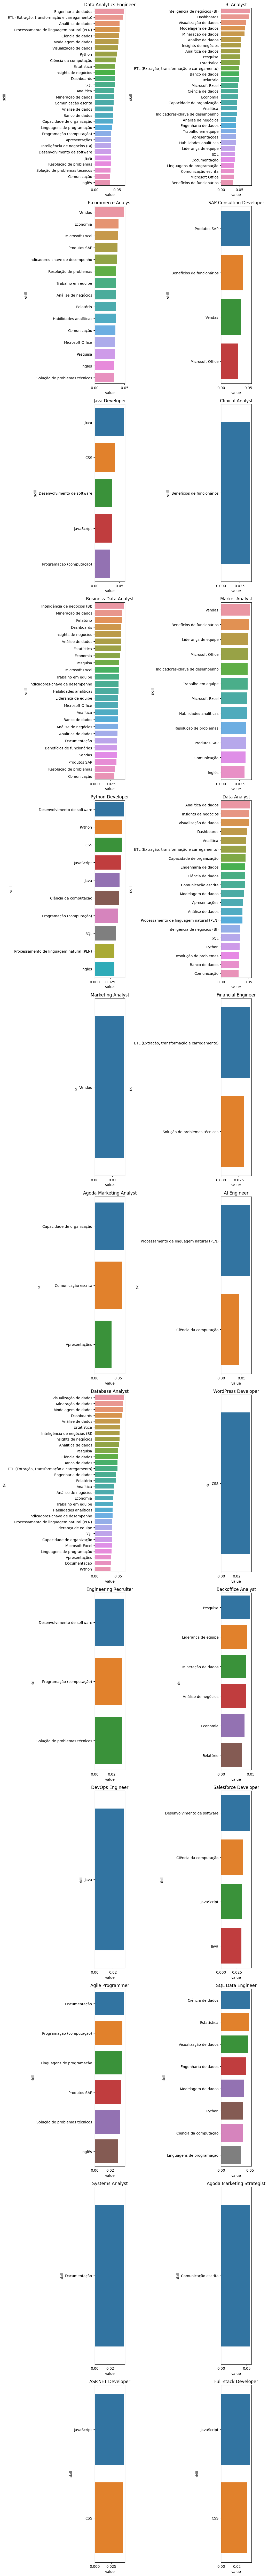

In [39]:
ordered_topics = [f'topic{i}' for i in range(len(df_jobs['Topic'].unique())) if f'topic{i}' in df_top_skills_topics['variable'].unique()]
fig, ax = plt.subplots(int(np.ceil(len(df_top_skills_topics['variable'].unique())/2)), 2, figsize=(10, 100))
i = 0
j = 0
for topic in ordered_topics:
    plot_top_skills_of_topic(re.sub('topic', '', topic), ax[i, j])
    j += 1
    if j == 2:
        j = 0
        i += 1

plt.tight_layout()

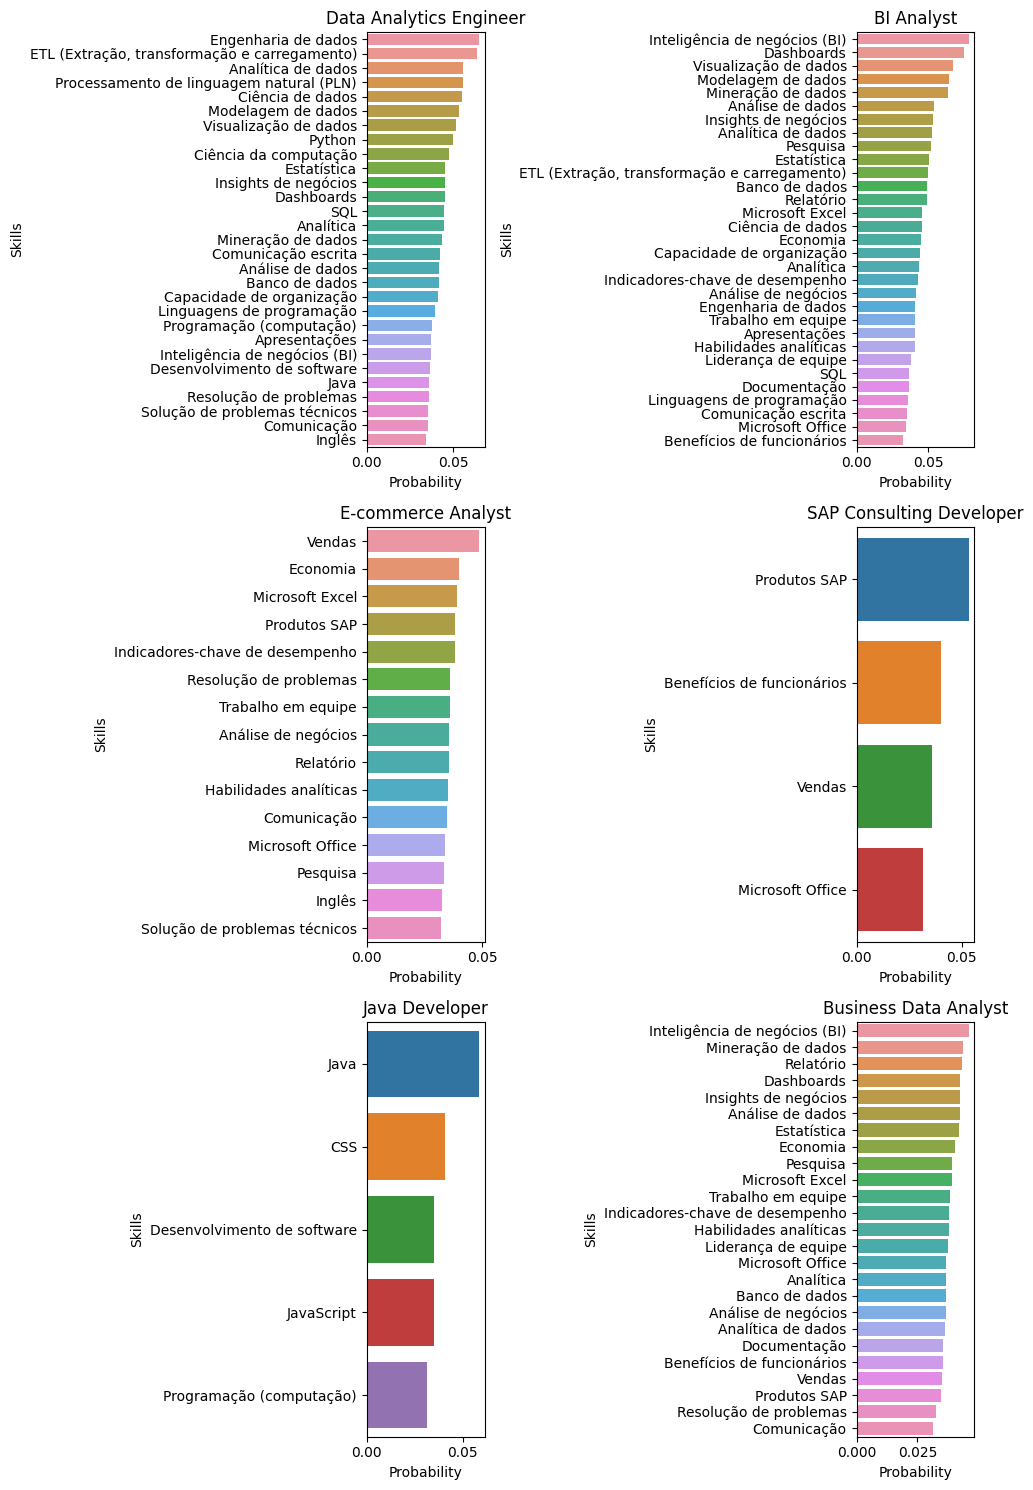

In [99]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
plot_top_skills_of_topic(0, ax=ax[0, 0])
plot_top_skills_of_topic(1, ax=ax[0, 1])
plot_top_skills_of_topic(2, ax=ax[1, 0])
plot_top_skills_of_topic(4, ax=ax[1, 1])
plot_top_skills_of_topic(8, ax=ax[2, 0])
plot_top_skills_of_topic(10, ax=ax[2, 1])
plt.tight_layout()

# Próximos passos:
Interpretar os gráficos anteriores, avaliando os mais interessantes para a apresentação. Adicionar o que for de interesse para a apresentação, possivelmente fazendo ajustes gráficos antes.

Separar as skills por tópico. Isto é, fazer um explode no dataframe e ver quais os tópicos associados a cada skill.

Fazer a apresentação do Tableau e xabláu!